In [ ]:
# import csv
import matplotlib.pyplot as plt
import re
import pandas as pd
import os
import datetime as dt

class GenderAge :
    def input_area(self) :
        while True :
            area = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
            if area.strip() == '' :
                print('아무것도 입력되지 않았습니다. 다시 입력해주세요.\n')
                continue
            # if area in ['읍', '동', '면'] :
            if area[len(area)-1] == '읍' or area[len(area)-1] == '면' or area[len(area)-1] == '동':
                break
            else :
                print('읍면동 단위로 입력해주세요.\n')
                continue

        return area

    def find_area(self, area) :
        result = False
        areas = []

        with open('./gender.csv' , encoding='cp949') as f :
            data = csv.reader(f)

            for row in data :
                if area in row[0] :
                    areas.append(row[0])
                    result = True

            if result :
                print('\n')
                print('{} 검색 결과'.format(area))
                if( len(areas) == 1 ) :
                    area = areas[0].split('(')[0]
                else :
                    area = self.choice_area(areas)
                print('{} 지역의 데이터를 불러오겠습니다.\n'.format(area))

        return result, area

    def choice_area(self, areas) :
        while True :
            try :
                for i in range(len(areas)) :
                    area = areas[i].split('(')[0]
                    print('{}. {}'.format(i, area))
                area_num = input('원하는 지역의 번호를 입력해주세요.')
                area_num = int(area_num)
            except ValueError :
                print('숫자를 입력해주세요.\n')
                continue
            else :
                if area_num < 0 or area_num > len(areas)-1 :
                    print('해당 범위 내의 숫자를 입력해주세요.\n')
                    continue
                else :
                    break
        return areas[area_num].split('(')[0]

    def open_csv(self, area) :
        male = []
        female = []
        age_info = []
        with open('./gender.csv', encoding='cp949') as f :
            data = csv.reader(f)
            header = next(data)[3:104]
            for age in header :
                age_info.append(age.split('_')[2])
                # print(age.split('_')[2])
            for row in data :
                if area in row[0] :
                    for i in row[3:104] :
                        male.append(int(i))
                    for i in row[106:] :
                        female.append(int(i))

        return age_info, male, female

    def choice_visual(self, male, female , area) :
        while True :
            try :
                visual_result = int(input('그래프를 선택해 주세요.\n1.선 그래프 2.막대 그래프 3.항아리 그래프 : '))
            except ValueError :
                print('숫자를 입력해주세요.\n')
                continue
            else :
                if visual_result == 1 :
                    self.plot_visual(male, female ,area)
                    break
                elif visual_result == 2 :
                    self.bar_visual(male, female ,area)
                    break
                elif visual_result == 3 :
                    self.barh_visual(male, female ,area)
                    break
                else :
                    print('범위 내의 숫자를 입력해주세요.\n')
    
    def plot_visual(self, male, female, area) :
        # plt.figure(figsize=(7,3), dpi=300)
        plt.rc('font', family = 'Malgun Gothic')
        plt.title('{} 연령별 인구수'.format(area))
        plt.style.use('ggplot')
        plt.plot(male, color='green', label='남자')
        plt.plot(female, color='orange' , label='여자')
        plt.legend()
        plt.show()
        
    def bar_visual(self, male, female, area) :
        # plt.figure(figsize=(7,3), dpi=300)
        plt.rc('font', family = 'Malgun Gothic')
        plt.title('{} 연령별 인구수'.format(area))
        plt.style.use('ggplot')
        plt.bar(range(101), male, color='gray', label='남자')
        plt.bar(range(101), female, color='beige' ,label='여자')
        plt.legend()
        plt.show()
    
    def barh_visual(self, male, female, area) :
        plt.style.use('ggplot')
        # plt.figure(figsize=(7,3), dpi=300)
        plt.rc('font', family = 'Malgun Gothic')
        plt.rcParams['axes.unicode_minus'] = False
        plt.title('{} 연령별 인구수'.format(area))
        # 리스트 양수형 정수를 음수형 정수형으로 바꿔주기 위한 함수생성
        def minus(n) :
            return -n
        male = list(map(minus, male))
        plt.barh(range(101), male , color='skyblue',label = '남자')
        plt.barh(range(101), female , color='pink', label = '여자')
        plt.legend()
        plt.show()
    
    def ask_store(self, age_info, male, female , area) :
        while True :
            ask = input('수집한 결과를 저장할까요?: [Y/N] ')
            if(ask in ['Y', 'y']):
                print('csv로 저장이 진행합니다.\n')
                self.write_csv(age_info, male, female, area)
                break
            elif(ask in ['N', 'n']) :
                break
            else :
                print('Y 또는 N으로만 응답해주세요.\n')
                continue
    
    def write_csv(self, age_info, male, female, area) :
        print('==============================================================')
        print('수집한 결과 저장 경로 : C:\\Users\pc201\\Visual_Study\\csv\\')
        print('파일 이름도 지역이름으로 자동 저장됩니다.')
        print('==============================================================')
        path = 'C:\\Users\pc201\\Visual_Study\\csv\\'
        if not os.path.exists(path) :
            os.makedirs(path)
            
        csv_path = path+area+'.csv'
        if os.path.isfile(csv_path) :
            print('동일파일 존재 : 파일이름에 날짜와 시간 데이터를 추가합니다.\n')
            x = dt.datetime.now().strftime('%y년%m월%d일_%H시%M분')
            csv_path = path+area+x+'.csv'
        
        print(len(age_info), len(male), len(female))
        sentences = pd.DataFrame()
        sentences['나이'] = age_info
        sentences['남자수'] = list(map(str,male))
        sentences['여자수'] = list(map(str,female))
        sentences.to_csv(csv_path ,encoding='CP949',index=False)
        print('csv 파일 저장 경로 : %s' %csv_path)

        print("요청하신 데이터 수집 작업이 정상적으로 완료되었습니다.\n")
    
    def continue_system(self):
        question = False
        while True :
            ask = input('계속 진행할까요?: [Y/N] ')
            if(ask in ['Y', 'y']):
                print('계속 진행합니다.\n')
                question = True
                break
            elif(ask in ['N', 'n']) :
                print('시스템을 종료합니다.\n')
                break
            else :
                print('Y 또는 N으로만 응답해주세요.\n')
                continue
        return question
        
while True :
    data = GenderAge()
    input_area = data.input_area()
    find_area_result, area = data.find_area(input_area)
    if find_area_result :
        print('해당 지역이 존재하여 시작화를 합니다.\n')
        age_info, male, female = data.open_csv(area)
        data.choice_visual(male, female, area)
        data.ask_store(age_info, male, female, input_area)  
    else :
        print('해당 지역이 존재하지 않습니다.\n')
        
    if data.continue_system() :
        continue
    else :
        break


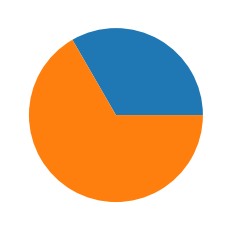

In [1]:
import matplotlib.pyplot as plt
plt.pie([10,20])
plt.show()

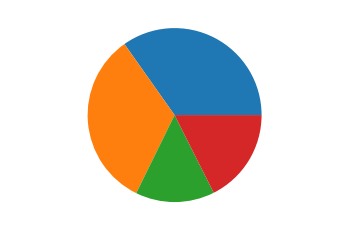

In [3]:
import matplotlib.pyplot as plt

size = [2441, 2312, 1031, 1233]
plt.axis('equal')
plt.pie(size)
plt.show()

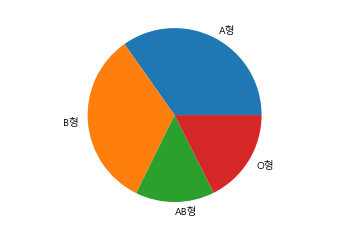

In [9]:
import matplotlib.pyplot as plt


size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']

plt.rc('font', family = 'Malgun Gothic')
plt.axis('equal')
plt.pie(size, labels= label)
plt.show()

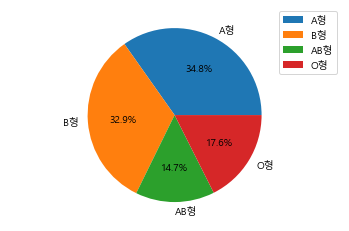

In [11]:
import matplotlib.pyplot as plt


size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']

plt.rc('font', family = 'Malgun Gothic')
plt.axis('equal')
plt.pie(size, labels= label, autopct = '%.1f%%')
plt.legend()
plt.show()



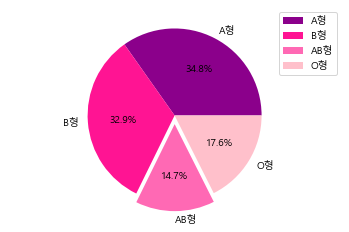

In [15]:
import matplotlib.pyplot as plt


size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.rc('font', family = 'Malgun Gothic')
plt.axis('equal')
plt.pie(size, labels= label, autopct = '%.1f%%', colors=color, explode = (0,0,0.1,0))
plt.legend()
plt.show()



In [25]:
import csv
import matplotlib.pyplot as plt
import re
import pandas as pd
import os
import datetime as dt

class GenderAge :
    def input_area(self) :
        while True :
            area = input('찾고 싶은 지역의 이름을 입력해주세요 : ')
            if area.strip() == '' :
                print('아무것도 입력되지 않았습니다. 다시 입력해주세요.\n')
                continue
            # if area in ['읍', '동', '면'] :
            # if area[len(area)-1] == '읍' or area[len(area)-1] == '면' or area[len(area)-1] == '동':
            else :
                break
            # else :
                # print('읍면동 단위로 입력해주세요.\n')
                # continue

        return area

    def find_area(self, area) :
        result = False
        areas = []

        with open('./gender.csv' , encoding='cp949') as f :
            data = csv.reader(f)

            for row in data :
                if area in row[0] :
                    areas.append(row[0])
                    result = True

            if result :
                print('\n')
                print('{} 검색 결과'.format(area))
                if( len(areas) == 1 ) :
                    area = areas[0].split('(')[0]
                else :
                    area = self.choice_area(areas)
                print('{} 지역의 데이터를 불러오겠습니다.\n'.format(area))

        return result, area

    def choice_area(self, areas) :
        while True :
            try :
                for i in range(len(areas)) :
                    area = areas[i].split('(')[0]
                    print('{}. {}'.format(i, area))
                area_num = input('원하는 지역의 번호를 입력해주세요.')
                area_num = int(area_num)
            except ValueError :
                print('숫자를 입력해주세요.\n')
                continue
            else :
                if area_num < 0 or area_num > len(areas)-1 :
                    print('해당 범위 내의 숫자를 입력해주세요.\n')
                    continue
                else :
                    break
        return areas[area_num].split('(')[0]

    def open_csv(self, area) :
        male = []
        female = []
        size = []
        result = []
        age_info = []
        with open('./gender.csv', encoding='cp949') as f :
            data = csv.reader(f)
            header = next(data)[3:104]
            for age in header :
                age_info.append(age.split('_')[2])
                # print(age.split('_')[2])
            for row in data :
                if area in row[0] :
                    c_male = 0
                    c_female = 0
                    '''
                    for i in range(101) :
                        c_male += int(row[i+3])
                        c_female += int(row[i+106])
                    '''
                    for i in row[3:104] :
                        male.append(int(i))
                        c_male +=int(i)
                    for i in row[106:] :
                        female.append(int(i))
                        c_female+=int(i)
                    for i in range(3,104) :
                        result.append(int(row[i+103]) - int(row[i]))
                    break
                    
            size.append(c_male)
            size.append(c_female)
    
        return age_info, male, female, size
    
    # def choice_visual(self, male, female , area) :
    def choice_visual(self, male, female ,size ,area) :
        while True :
            try :
                visual_result = int(input('그래프를 선택해 주세요.\n1.선 그래프 2.막대 그래프 3.항아리 그래프 4,파이 그래프 : '))
            except ValueError :
                print('숫자를 입력해주세요.\n')
                continue
            else :
                if visual_result == 1 :
                    self.plot_visual(male, female ,area)
                    break
                elif visual_result == 2 :
                    self.bar_visual(male, female ,area)
                    # self.bar_visual(size ,area)
                    break
                elif visual_result == 3 :
                    self.barh_visual(male, female ,area)
                    break
                elif visual_result == 4 :
                    self.pie_visual(size, area)
                    break
                else :
                    print('범위 내의 숫자를 입력해주세요.\n')
    
    def plot_visual(self, male, female, area) :
        # plt.figure(figsize=(7,3), dpi=300)
        plt.rc('font', family = 'Malgun Gothic')
        plt.title('{} 연령별 인구수'.format(area))
        plt.style.use('ggplot')
        plt.plot(male, color='green', label='남자')
        plt.plot(female, color='orange' , label='여자')
        plt.legend()
        plt.show()
        
    def bar_visual(self, male, female, area) :
        # plt.figure(figsize=(7,3), dpi=300)
        plt.rc('font', family = 'Malgun Gothic')
        plt.title('{} 연령별 인구수'.format(area))
        plt.style.use('ggplot')
        plt.bar(range(101), male, color='gray', label='남자')
        plt.bar(range(101), female, color='beige' ,label='여자')
        plt.legend()
        plt.show()
    
    def barh_visual(self, male, female, area) :
        plt.style.use('ggplot')
        # plt.figure(figsize=(7,3), dpi=300)
        plt.rc('font', family = 'Malgun Gothic')
        plt.rcParams['axes.unicode_minus'] = False
        plt.title('{} 연령별 인구수'.format(area))
        # 리스트 양수형 정수를 음수형 정수형으로 바꿔주기 위한 함수생성
        def minus(n) :
            return -n
        male = list(map(minus, male))
        plt.barh(range(101), male , color='skyblue',label = '남자')
        plt.barh(range(101), female , color='pink', label = '여자')
        plt.legend()
        plt.show()
    
    def pie_visual(self, size, area) :
        area = area.strip()
        plt.rc('font', family = 'Malgun Gothic')
        color = ['crimson', 'darkcyan']
        plt.axis('equal')
        plt.pie(size, labels=['남', '여'], autopct = '%.1f%%', colors= color, startangle=90)
        plt.title('{} 남녀 성비 비율'.format(area))
        plt.show()
        
    def bar_division_visual(self, result, area) :
        plt.style.use('ggplot')
        plt.rc('font', family = 'Malgun Gothic')
        plt.rcParams['axes.unicode_minus'] = False
        plt.title('{} 연령별 인구수'.format(area))
        plt.bar(range(101), result)
        plt.show()
        
    def ask_store(self, age_info, male, female , area) :
        while True :
            ask = input('수집한 결과를 저장할까요?: [Y/N] ')
            if(ask in ['Y', 'y']):
                print('csv로 저장이 진행합니다.\n')
                self.write_csv(age_info, male, female, area)
                break
            elif(ask in ['N', 'n']) :
                break
            else :
                print('Y 또는 N으로만 응답해주세요.\n')
                continue
    
    def write_csv(self, age_info, male, female, area) :
        print('==============================================================')
        print('수집한 결과 저장 경로 : C:\\Users\pc201\\Visual_Study\\csv\\')
        print('파일 이름도 지역이름으로 자동 저장됩니다.')
        print('==============================================================')
        path = 'C:\\Users\pc201\\Visual_Study\\csv\\'
        if not os.path.exists(path) :
            os.makedirs(path)
            
        csv_path = path+area+'.csv'
        if os.path.isfile(csv_path) :
            print('동일파일 존재 : 파일이름에 날짜와 시간 데이터를 추가합니다.\n')
            x = dt.datetime.now().strftime('%y년%m월%d일_%H시%M분')
            csv_path = path+area+x+'.csv'

        sentences = pd.DataFrame()
        sentences['나이'] = age_info
        sentences['남자수'] = list(map(str,male))
        sentences['여자수'] = list(map(str,female))
        sentences.to_csv(csv_path ,encoding='CP949',index=False)
        print('csv 파일 저장 경로 : %s' %csv_path)

        print("요청하신 데이터 수집 작업이 정상적으로 완료되었습니다.\n")
    
    def continue_system(self):
        question = False
        while True :
            ask = input('계속 진행할까요?: [Y/N] ')
            if(ask in ['Y', 'y']):
                print('계속 진행합니다.\n')
                question = True
                break
            elif(ask in ['N', 'n']) :
                print('시스템을 종료합니다.\n')
                break
            else :
                print('Y 또는 N으로만 응답해주세요.\n')
                continue
        return question
        
while True :
    data = GenderAge()
    input_area = data.input_area()
    find_area_result, area = data.find_area(input_area)
    if find_area_result :
        print('해당 지역이 존재하여 시작화를 합니다.\n')
        age_info, male, female, size = data.open_csv(area)
        data.choice_visual(male, female, size, area)
        data.ask_store(age_info, male, female, input_area)  
    else :
        print('해당 지역이 존재하지 않습니다.\n')
        
    if data.continue_system() :
        continue
    else :
        break


찾고 싶은 지역의 이름을 입력해주세요 : 하하동
해당 지역이 존재하지 않습니다.

계속 진행할까요?: [Y/N] n
시스템을 종료합니다.



# 삼전도로 표현하기

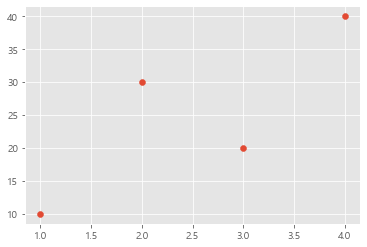

In [26]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter([1,2,3,4], [10,30,20,40])
plt.show()

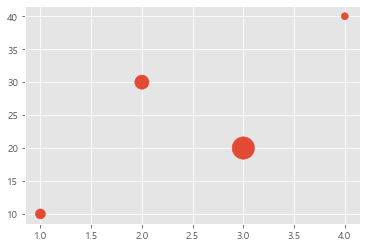

In [29]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter([1,2,3,4], [10,30,20,40], s = [100,200,500,50])
plt.show()

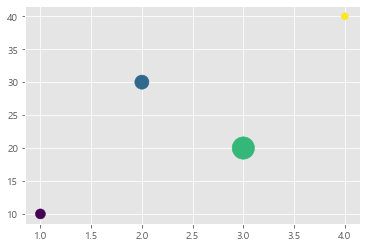

In [30]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter([1,2,3,4], [10,30,20,40], s = [100,200,500,50], c=range(4))
plt.show()

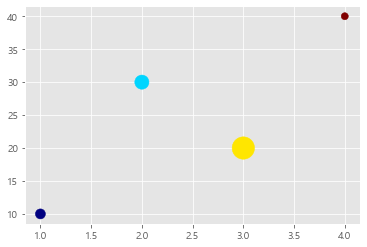

In [31]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter([1,2,3,4], [10,30,20,40], s = [100,200,500,50], c=range(4), cmap='jet')
plt.show()

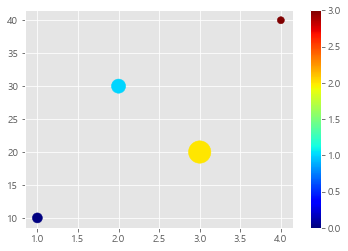

In [32]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter([1,2,3,4], [10,30,20,40], s = [100,200,500,50], c=range(4), cmap='jet')
plt.colorbar()
plt.show()

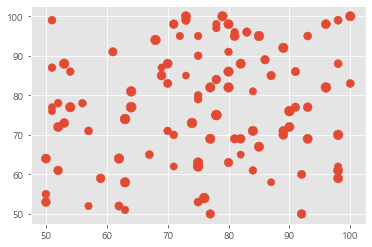

In [33]:
import matplotlib.pylab as plt
import random

x = []
y = []
size = []

for i in range(100) :
    x.append(random.randint(50,100))
    y.append(random.randint(50,100))
    size.append(random.randint(50,100))
    
plt.scatter(x,y,s=size)
plt.show()

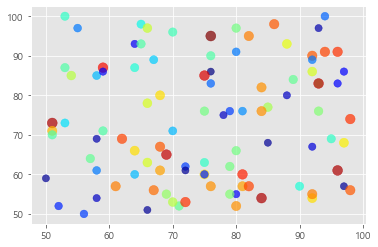

In [34]:
import matplotlib.pylab as plt
import random

x = []
y = []
size = []

for i in range(100) :
    x.append(random.randint(50,100))
    y.append(random.randint(50,100))
    size.append(random.randint(50,100))
    
plt.scatter(x,y,s=size, c=size, cmap='jet', alpha=0.7)
plt.show()

# 제주도의 연령대별 성별 비율을 산점도로 표현하기

찾고 싶은 지역의 이름을 입력해주세요 : 제주


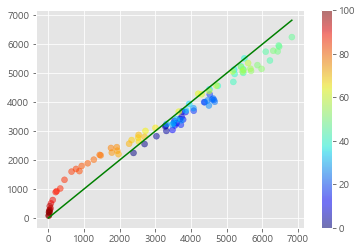

In [37]:
import csv
import matplotlib.pylab as plt

file = open('./gender.csv')
data = csv.reader(file)
m = []
f = []

name = input('찾고 싶은 지역의 이름을 입력해주세요 : ')
for row in data :
    if name in row[0] :
        for i in range(3,104) :
            m.append(int(row[i]))
            f.append(int(row[i+103]))
        break
        
plt.scatter(m,f, c= range(101), alpha=0.5, cmap='jet')
plt.colorbar()
plt.plot(range(max(m)), range(max(m)), 'g') # 추세선
plt.show()

찾고 싶은 지역의 이름을 입력해주세요 : 제주특별자치도


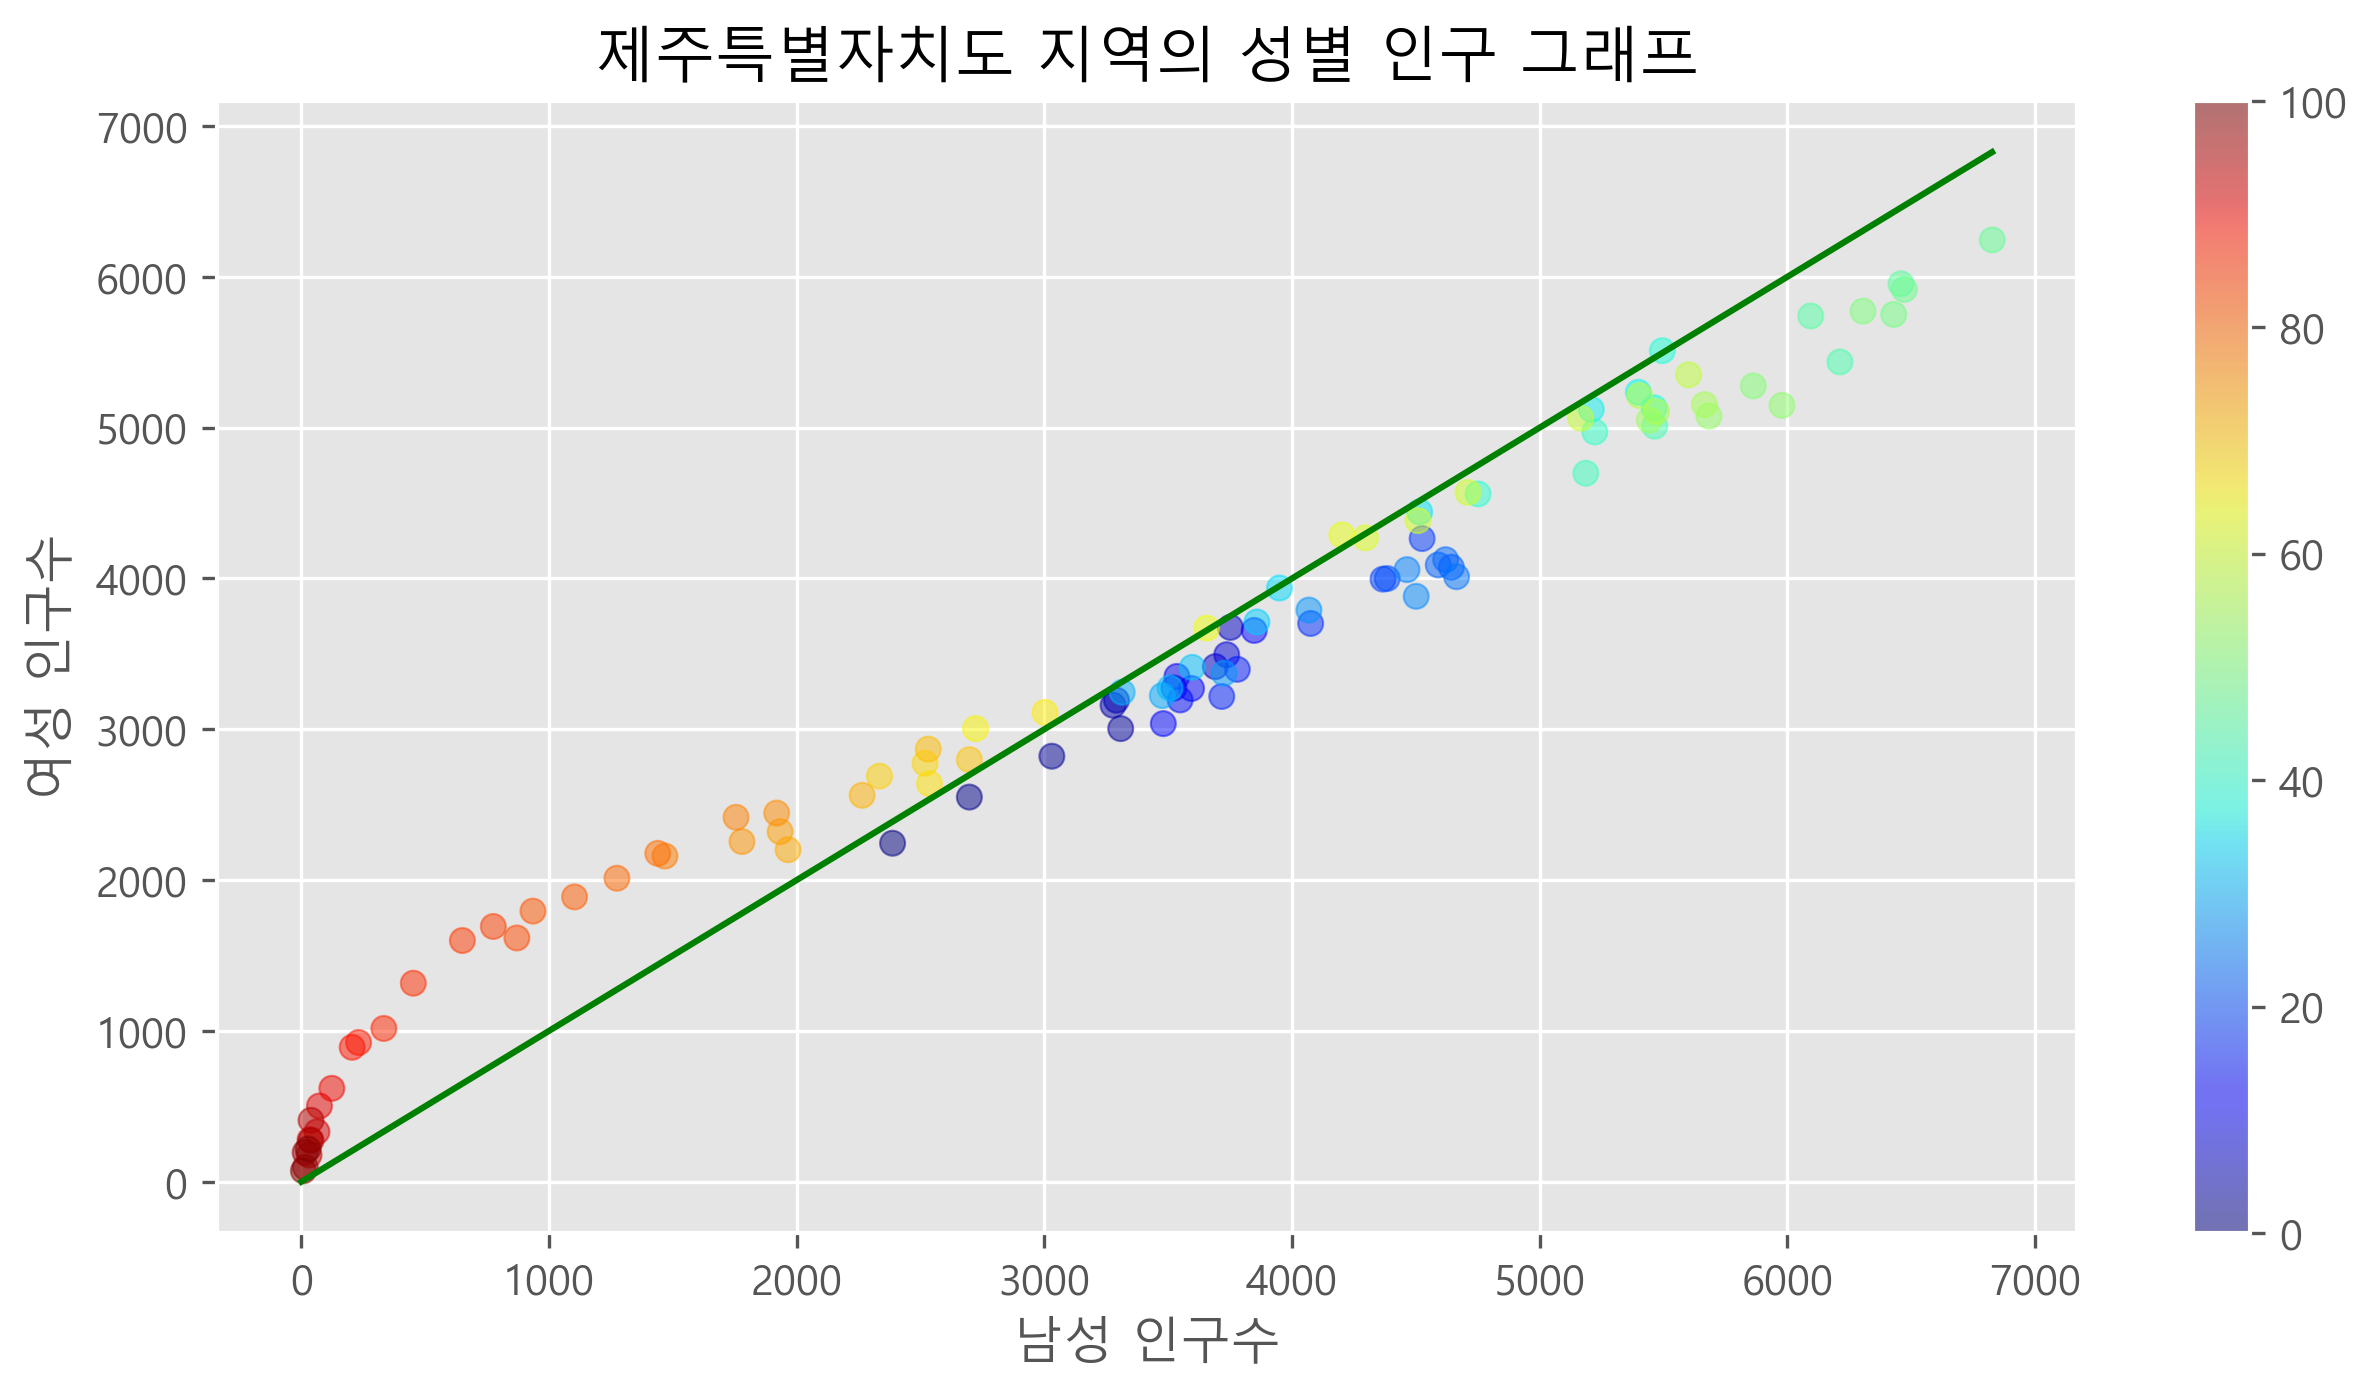

In [40]:
import csv
import matplotlib.pylab as plt
import math
file = open('./gender.csv')
data = csv.reader(file)
m = []
f = []
size = []
name = input('찾고 싶은 지역의 이름을 입력해주세요 : ')
for row in data :
    if name in row[0] :
        for i in range(3,104) :
            m.append(int(row[i]))
            f.append(int(row[i+103]))
            size.append(math.sqrt(int(row[i]))+int(row[i+103]))
        break
    
plt.style.use('ggplot')
plt.rc('font', family = 'Malgun Gothic')
plt.figure(figsize=(10,5), dpi=300)
plt.title(name + ' 지역의 성별 인구 그래프')
plt.scatter(m, f, c = range(101), alpha = 0.5, cmap = 'jet')
plt.colorbar()
plt.plot(range(max(m)), range(max(m)), 'g')
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')
plt.show()

찾고 싶은 지역의 이름을 입력해주세요 : 신흥


신흥 검색 결과
0. 인천광역시 중구 신흥동
1. 광주광역시 광산구 신흥동
2. 대전광역시 유성구 원신흥동
3. 경기도 성남시 수정구 신흥1동
4. 경기도 성남시 수정구 신흥2동
5. 경기도 성남시 수정구 신흥3동
6. 경기도 부천시 신흥동
7. 전라남도 목포시 신흥동
8. 경상북도 상주시 신흥동
원하는 지역의 번호를 입력해주세요.4
경기도 성남시 수정구 신흥2동 지역의 데이터를 불러오겠습니다.

해당 지역이 존재하여 시작화를 합니다.

그래프를 선택해 주세요.
1.선 그래프 2.막대 그래프 3.항아리 그래프 4,파이 그래프 5.산점도 그래프 : 5


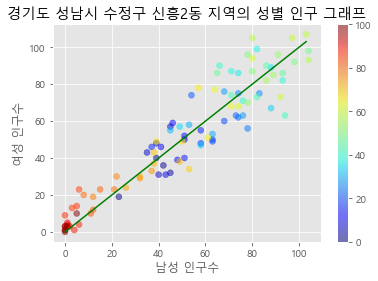

수집한 결과를 저장할까요?: [Y/N] y
csv로 저장이 진행합니다.

수집한 결과 저장 경로 : C:\Users\pc201\Visual_Study\csv\
파일 이름도 지역이름으로 자동 저장됩니다.
csv 파일 저장 경로 : C:\Users\pc201\Visual_Study\csv\신흥.csv
요청하신 데이터 수집 작업이 정상적으로 완료되었습니다.

계속 진행할까요?: [Y/N] n
시스템을 종료합니다.



In [42]:
import csv
import matplotlib.pyplot as plt
import re
import pandas as pd
import os
import datetime as dt

class GenderAge :
    def input_area(self) :
        while True :
            area = input('찾고 싶은 지역의 이름을 입력해주세요 : ')
            if area.strip() == '' :
                print('아무것도 입력되지 않았습니다. 다시 입력해주세요.\n')
                continue
            # if area in ['읍', '동', '면'] :
            # if area[len(area)-1] == '읍' or area[len(area)-1] == '면' or area[len(area)-1] == '동':
            else :
                break
            # else :
                # print('읍면동 단위로 입력해주세요.\n')
                # continue

        return area

    def find_area(self, area) :
        result = False
        areas = []

        with open('./gender.csv' , encoding='cp949') as f :
            data = csv.reader(f)

            for row in data :
                if area in row[0] :
                    areas.append(row[0])
                    result = True

            if result :
                print('\n')
                print('{} 검색 결과'.format(area))
                if( len(areas) == 1 ) :
                    area = areas[0].split('(')[0]
                else :
                    area = self.choice_area(areas)
                print('{} 지역의 데이터를 불러오겠습니다.\n'.format(area))

        return result, area

    def choice_area(self, areas) :
        while True :
            try :
                for i in range(len(areas)) :
                    area = areas[i].split('(')[0]
                    print('{}. {}'.format(i, area))
                area_num = input('원하는 지역의 번호를 입력해주세요.')
                area_num = int(area_num)
            except ValueError :
                print('숫자를 입력해주세요.\n')
                continue
            else :
                if area_num < 0 or area_num > len(areas)-1 :
                    print('해당 범위 내의 숫자를 입력해주세요.\n')
                    continue
                else :
                    break
        return areas[area_num].split('(')[0]

    def open_csv(self, area) :
        male = []
        female = []
        size = []
        result = []
        age_info = []
        with open('./gender.csv', encoding='cp949') as f :
            data = csv.reader(f)
            header = next(data)[3:104]
            for age in header :
                age_info.append(age.split('_')[2])
                # print(age.split('_')[2])
            for row in data :
                if area in row[0] :
                    c_male = 0
                    c_female = 0
                    '''
                    for i in range(101) :
                        c_male += int(row[i+3])
                        c_female += int(row[i+106])
                    '''
                    for i in row[3:104] :
                        male.append(int(i))
                        c_male +=int(i)
                    for i in row[106:] :
                        female.append(int(i))
                        c_female+=int(i)
                    for i in range(3,104) :
                        result.append(int(row[i+103]) - int(row[i]))
                    break
                    
            size.append(c_male)
            size.append(c_female)
    
        return age_info, male, female, size
    
    # def choice_visual(self, male, female , area) :
    def choice_visual(self, male, female ,size ,area) :
        while True :
            try :
                visual_result = int(input('그래프를 선택해 주세요.\n1.선 그래프 2.막대 그래프 3.항아리 그래프 4,파이 그래프 5.산점도 그래프 : '))
            except ValueError :
                print('숫자를 입력해주세요.\n')
                continue
            else :
                if visual_result == 1 :
                    self.plot_visual(male, female ,area)
                    break
                elif visual_result == 2 :
                    self.bar_visual(male, female ,area)
                    # self.bar_visual(size ,area)
                    break
                elif visual_result == 3 :
                    self.barh_visual(male, female ,area)
                    break
                elif visual_result == 4 :
                    self.pie_visual(size, area)
                    break
                elif visual_result == 5 :
                    self.scatter_visual(male, female, size, area)
                    break
                else :
                    print('범위 내의 숫자를 입력해주세요.\n')
    
    def plot_visual(self, male, female, area) :
        # plt.figure(figsize=(7,3), dpi=300)
        plt.rc('font', family = 'Malgun Gothic')
        plt.title('{} 연령별 인구수'.format(area))
        plt.style.use('ggplot')
        plt.plot(male, color='green', label='남자')
        plt.plot(female, color='orange' , label='여자')
        plt.legend()
        plt.show()
        
    def bar_visual(self, male, female, area) :
        # plt.figure(figsize=(7,3), dpi=300)
        plt.rc('font', family = 'Malgun Gothic')
        plt.title('{} 연령별 인구수'.format(area))
        plt.style.use('ggplot')
        plt.bar(range(101), male, color='gray', label='남자')
        plt.bar(range(101), female, color='beige' ,label='여자')
        plt.legend()
        plt.show()
    
    def barh_visual(self, male, female, area) :
        plt.style.use('ggplot')
        # plt.figure(figsize=(7,3), dpi=300)
        plt.rc('font', family = 'Malgun Gothic')
        plt.rcParams['axes.unicode_minus'] = False
        plt.title('{} 연령별 인구수'.format(area))
        # 리스트 양수형 정수를 음수형 정수형으로 바꿔주기 위한 함수생성
        def minus(n) :
            return -n
        male = list(map(minus, male))
        plt.barh(range(101), male , color='skyblue',label = '남자')
        plt.barh(range(101), female , color='pink', label = '여자')
        plt.legend()
        plt.show()
    
    def pie_visual(self, size, area) :
        area = area.strip()
        plt.rc('font', family = 'Malgun Gothic')
        color = ['crimson', 'darkcyan']
        plt.axis('equal')
        plt.pie(size, labels=['남', '여'], autopct = '%.1f%%', colors= color, startangle=90)
        plt.title('{} 남녀 성비 비율'.format(area))
        plt.show()
        
    def bar_division_visual(self, result, area) :
        plt.style.use('ggplot')
        plt.rc('font', family = 'Malgun Gothic')
        plt.rcParams['axes.unicode_minus'] = False
        plt.title('{} 연령별 인구수'.format(area))
        plt.bar(range(101), result)
        plt.show()
    
    def scatter_visual(self, male, female, size, area) :
        plt.style.use('ggplot')
        plt.rc('font', family = 'Malgun Gothic')
        plt.title(area + ' 지역의 성별 인구 그래프')
        plt.scatter(male, female, c = range(101), alpha = 0.5, cmap = 'jet')
        plt.colorbar()
        plt.plot(range(max(male)), range(max(male)), 'g')
        plt.xlabel('남성 인구수')
        plt.ylabel('여성 인구수')
        plt.show()
        
        
    def ask_store(self, age_info, male, female , area) :
        while True :
            ask = input('수집한 결과를 저장할까요?: [Y/N] ')
            if(ask in ['Y', 'y']):
                print('csv로 저장이 진행합니다.\n')
                self.write_csv(age_info, male, female, area)
                break
            elif(ask in ['N', 'n']) :
                break
            else :
                print('Y 또는 N으로만 응답해주세요.\n')
                continue
    
    def write_csv(self, age_info, male, female, area) :
        print('==============================================================')
        print('수집한 결과 저장 경로 : C:\\Users\pc201\\Visual_Study\\csv\\')
        print('파일 이름도 지역이름으로 자동 저장됩니다.')
        print('==============================================================')
        path = 'C:\\Users\pc201\\Visual_Study\\csv\\'
        if not os.path.exists(path) :
            os.makedirs(path)
            
        csv_path = path+area+'.csv'
        if os.path.isfile(csv_path) :
            print('동일파일 존재 : 파일이름에 날짜와 시간 데이터를 추가합니다.\n')
            x = dt.datetime.now().strftime('%y년%m월%d일_%H시%M분')
            csv_path = path+area+x+'.csv'

        sentences = pd.DataFrame()
        sentences['나이'] = age_info
        sentences['남자수'] = list(map(str,male))
        sentences['여자수'] = list(map(str,female))
        sentences.to_csv(csv_path ,encoding='CP949',index=False)
        print('csv 파일 저장 경로 : %s' %csv_path)

        print("요청하신 데이터 수집 작업이 정상적으로 완료되었습니다.\n")
    
    def continue_system(self):
        question = False
        while True :
            ask = input('계속 진행할까요?: [Y/N] ')
            if(ask in ['Y', 'y']):
                print('계속 진행합니다.\n')
                question = True
                break
            elif(ask in ['N', 'n']) :
                print('시스템을 종료합니다.\n')
                break
            else :
                print('Y 또는 N으로만 응답해주세요.\n')
                continue
        return question
        
while True :
    data = GenderAge()
    input_area = data.input_area()
    find_area_result, area = data.find_area(input_area)
    if find_area_result :
        print('해당 지역이 존재하여 시작화를 합니다.\n')
        age_info, male, female, size = data.open_csv(area)
        data.choice_visual(male, female, size, area)
        data.ask_store(age_info, male, female, input_area)  
    else :
        print('해당 지역이 존재하지 않습니다.\n')
        
    if data.continue_system() :
        continue
    else :
        break
